# Fernandez et al. (2011)<br />**Bat *Saccopteryx bilineata***

- **Paper:** Fernandez, A. A., Burchardt, L. S., Nagy, M., &amp; Knörnschild, M. (2021). Babbling in a vocal learning bat resembles human infant babbling. <i>Science</i>, <i>373</i>(6557), 923–926. <a href="https://doi.org/10.1126/science.abf9279">https://doi.org/10.1126/science.abf9279</a>
- **Dataset:** Fernandez, Ahana; Burchardt, Lara; Nagy, Martina; Knörnschild, Mirjam (2021), Babbling in a vocal learning bat resembles human infant babbling, Dryad, Dataset, https://doi.org/10.5061/dryad.1c59zw3vg
- **Dataset license:** CC0 1.0 Universal (CC0 1.0) Public Domain Dedication license.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.intervals import load_intervals, save_intervals
from src.motifs import ngram_motifs, normalize, string_motifs, separate_sequences
from src.plotting import ternary_motif_plot

## Preprocessing

The normalized pairwise variability index (nPVI) is calculated to assess temporal variance in syllable trains and whether a syllable train is isochronous.	
The nPVI indicates the goodness of predictability from one IOI to the subsequent. The lower the nPVI, the more isochronous is the syllable train.	

For the method see: Burchardt L, Knörnschild M (2020) Comparison of methods for rhythm analysis of complex animals’ acoustic signals. PLoS Comput. Biol. 16, e1007755. doi:10.1371/journal.pcbi.1007755	

N = 30 syllable trains (6 trains per train type) produced by 14 different pups from two populations (Panama, Costa Rica)	
	
Column headings	
- `population`	Panama, Costa Rica
- `pup ID`	Identification numbers of pups
- `recording date`	year_month_day
- `syllable train type`	affiliative, aggressive, neutral, IC, UPS (see supplementary material for definitions)
- `label`	position of syllable in sequence
- `duration` [s]	duration of each syllable from start to end
- `start time`	time stamp of syllable onset
- `end time`	time stamp of syllable offset
- `IOI`	inter-onset-interval (time between the start of one syllable and the start of the next syllable)
- `nPVI`	normalized Pairwise Variability Index

In [2]:
columns = [
    'population',
    'pup_id', 
    'recording_date', 
    'syllable_train_type',
    'syllable_position', # was label 
    'syllable_duration',
    'syllable_start',
    'syllable_end',
    'syllable_ioi'
] 

In [3]:
df = pd.read_csv('data/fernandez2021/IOI.csv', delimiter=';', decimal=",",  header=[0,1])
df.columns = columns
sequences = []
cur_seq = 0
for _, pos in df['syllable_position'].items():
    if pos == 1:
        cur_seq += 1
    sequences.append(cur_seq)
df['sequence'] = sequences
# df.to_csv('intervals/fernandez2021/fernandez2021-data.csv')

In [4]:
intervals = []
for _, (pos, ioi) in df[['syllable_position', 'syllable_ioi']].iterrows():
    if pos == 1:
        intervals.append(np.nan)
    intervals.append(ioi)
intervals= np.array(intervals[1:])
# save_intervals(intervals, 'fernandez2021', 'fernandez2021')

## Plot

In [5]:
intervals = load_intervals('fernandez2021', 'fernandez2021')
df = pd.read_csv('intervals/fernandez2021/fernandez2021-data.csv')

(<Figure size 900x600 with 2 Axes>,
 TernaryAxesSubplot: 293757741,
 <matplotlib.colorbar.Colorbar at 0x10b75ec90>)

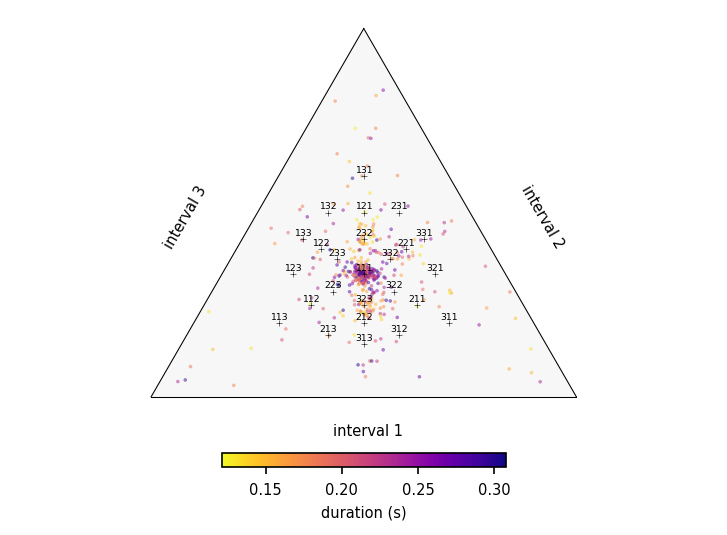

In [6]:
motifs, duration = normalize(ngram_motifs(intervals, length=3))
ternary_motif_plot(motifs, duration, scatter_kws=dict(s=3, alpha=.5))

(<Figure size 900x600 with 2 Axes>,
 TernaryAxesSubplot: 294215293,
 <matplotlib.colorbar.Colorbar at 0x10996f7d0>)

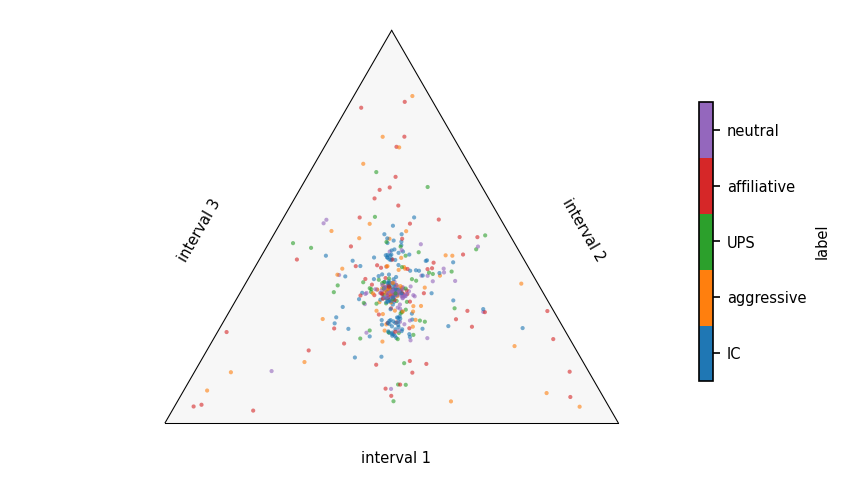

In [7]:
types = [ 'neutral', 'affiliative', 'UPS', 'aggressive', 'IC']
subset = separate_sequences(df[df['syllable_train_type'].isin(types)])

# Get rhythm motifs
intervals = subset['syllable_ioi'].values
motifs, duration = normalize(ngram_motifs(intervals, length=3))

# Determine labels
# Ignore columns where ioi is missing, but train type is not (i.e., last syll in a seq)
mismatch = subset['syllable_ioi'].isna() & (~subset['syllable_train_type'].isna())
train_types = subset[~mismatch]['syllable_train_type'].values
# All motifs in a sequence have the same type, so we just pick the first
labels = string_motifs(train_types, 3, aggregator=lambda motif: motif[0])

ternary_motif_plot(motifs, duration, labels=labels, 
    scatter_kws=dict(s=4, alpha=.6), ratios=False, ratio_kws=dict(factors=[1,2]),
    cbar_kws=dict(orientation='vertical', pad=-0.1, fraction=0.02))

### Combined

(<Figure size 1200x450 with 4 Axes>,
 TernaryAxesSubplot: 280510109,
 <matplotlib.colorbar.Colorbar at 0x10ba8b390>)

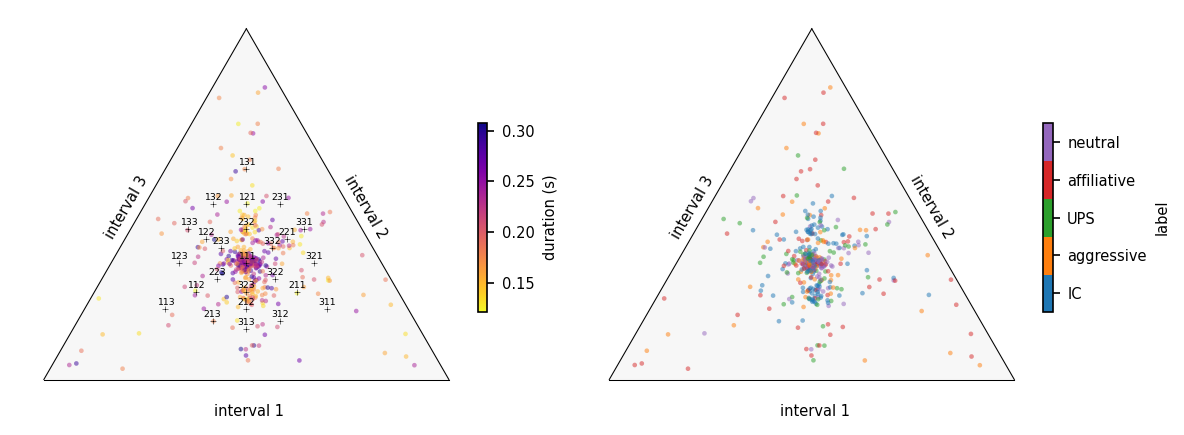

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3), tight_layout=True)

kws = dict(
    scatter_kws=dict(s=5, alpha=.5), 
    cbar_kws=dict(orientation='vertical', pad=0, fraction=0.02)
)

# Plot, colored by duration
intervals = load_intervals('fernandez2021', 'fernandez2021')
motifs, duration = normalize(ngram_motifs(intervals, length=3))
ternary_motif_plot(motifs, duration, ax=ax1, **kws)

# Plot colored by category
types = [ 'neutral', 'affiliative', 'UPS', 'aggressive', 'IC']
subset = separate_sequences(df[df['syllable_train_type'].isin(types)])

# Get rhythm motifs
intervals = subset['syllable_ioi'].values
motifs, duration = normalize(ngram_motifs(intervals, length=3))

# Determine labels
# Ignore columns where ioi is missing, but train type is not (i.e., last syll in a seq)
mismatch = subset['syllable_ioi'].isna() & (~subset['syllable_train_type'].isna())
train_types = subset[~mismatch]['syllable_train_type'].values
# All motifs in a sequence have the same type, so we just pick the first
labels = string_motifs(train_types, 3, aggregator=lambda motif: motif[0])

ternary_motif_plot(motifs, duration, labels=labels, 
    ratios=False, ratio_kws=dict(factors=[1,2]), ax=ax2, 
    **kws)

# plt.savefig('figures/fernandez2021/fernandez2021.pdf')